In [ ]:
## Notebook 1 Pre-Processing using pandas, matplotlib, and sklearn

# Daniel Sandoz

In [2]:
# Importing Packages
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn import tree 
from sklearn.decomposition import PCA

In [6]:
## 1. Read in auto.csv file
auto=pd.read_csv("C:/Users/Modeling/Documents/Predictive Models/PM Data/AUTO.csv", encoding='ISO-8859-1')
auto

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
0,Acura Integra,Front,31.0,Regular,13.2,172.0,101.0,67.0,39.0,"2,635",47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5
1,Acura TL,Front,22.0,Premium,17.1,193.0,108.0,70.0,40.0,"3,460",50.0,14.0,56.0,40.5,2.5,55.0,27.0,2.0
2,Buick Century,Front,22.0,Regular,17.5,195.0,109.0,73.0,40.0,"3,350",50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0
3,Buick LeSabre,Front,20.0,Regular,17.5,200.0,112.0,74.0,42.0,"3,640",51.0,18.0,59.5,40.5,5.0,58.0,27.5,4.5
4,Buick Park Avenue,Front,21.0,Regular,18.5,207.0,114.0,75.0,43.0,"3,880",51.0,19.0,59.5,42.5,6.0,58.5,31.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## 2. Replace Missing Values with Median Values


In [7]:
#remove NaN rows
auto=auto.drop(auto.index[106:190])

In [8]:
auto.mean()

Mileage (mpg)                21.292453
Capacity (gal)               17.883019
Length (inches)             187.594340
Wheel Base (inches)         107.632075
Width (inches)               70.915094
Turning Circle (feet)        39.849057
Door Top (inches)            53.891509
Luggage (cu. ft.)            25.230769
Front Shoulder (inches)      56.471698
Front Leg Room (inches)      41.254717
Front Head Room (inches)      4.287736
Rear Shoulder (inches)       54.745283
Rear Leg Room (inches)       28.363208
Rear Head Room (inches)       3.023585
dtype: float64

In [9]:
# fill missing luggage with mean
auto=auto.fillna(auto.mean())

In [10]:
# double check missing values
np.sum(auto.isnull())

Name                        0
Drive Type                  0
Mileage (mpg)               0
Fuel Type                   0
Capacity (gal)              0
Length (inches)             0
Wheel Base (inches)         0
Width (inches)              0
Turning Circle (feet)       0
Weight (lbs)                0
Door Top (inches)           0
Luggage (cu. ft.)           0
Front Shoulder (inches)     0
Front Leg Room (inches)     0
Front Head Room (inches)    0
Rear Shoulder (inches)      0
Rear Leg Room (inches)      0
Rear Head Room (inches)     0
dtype: int64

In [ ]:
## 3. General Characteristics


In [11]:
#show variables by type
auto.dtypes

Name                         object
Drive Type                   object
Mileage (mpg)               float64
Fuel Type                    object
Capacity (gal)              float64
Length (inches)             float64
Wheel Base (inches)         float64
Width (inches)              float64
Turning Circle (feet)       float64
Weight (lbs)                 object
Door Top (inches)           float64
Luggage (cu. ft.)           float64
Front Shoulder (inches)     float64
Front Leg Room (inches)     float64
Front Head Room (inches)    float64
Rear Shoulder (inches)      float64
Rear Leg Room (inches)      float64
Rear Head Room (inches)     float64
dtype: object

In [12]:
#individual mean of numerical variables
auto.mean(numeric_only=True)

Mileage (mpg)                21.292453
Capacity (gal)               17.883019
Length (inches)             187.594340
Wheel Base (inches)         107.632075
Width (inches)               70.915094
Turning Circle (feet)        39.849057
Door Top (inches)            53.891509
Luggage (cu. ft.)            25.230769
Front Shoulder (inches)      56.471698
Front Leg Room (inches)      41.254717
Front Head Room (inches)      4.287736
Rear Shoulder (inches)       54.745283
Rear Leg Room (inches)       28.363208
Rear Head Room (inches)       3.023585
dtype: float64

In [13]:
#individual standard deviation of numeric variables
auto.std(numeric_only=True)

Mileage (mpg)                3.769469
Capacity (gal)               3.425714
Length (inches)             12.493639
Wheel Base (inches)          7.014713
Width (inches)               3.237041
Turning Circle (feet)        2.797252
Door Top (inches)            5.747465
Luggage (cu. ft.)           18.191825
Front Shoulder (inches)      3.041640
Front Leg Room (inches)      1.021775
Front Head Room (inches)     1.279784
Rear Shoulder (inches)       7.110437
Rear Leg Room (inches)       2.196895
Rear Head Room (inches)      1.370405
dtype: float64

In [14]:
#mean and standard deviations of numerical variables
auto.describe()

,Mileage (mpg),Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,21.292453,17.883019,187.594340,107.632075,70.915094,39.849057,53.891509,25.230769,56.471698,41.254717,4.287736,54.745283,28.363208,3.023585
std,3.769469,3.425714,12.493639,7.014713,3.237041,2.797252,5.747465,18.191825,3.041640,1.021775,1.279784,7.110437,2.196895,1.370405
min,13.000000,12.100000,152.000000,93.000000,66.000000,34.000000,46.500000,10.000000,51.500000,39.000000,1.500000,6.500000,22.500000,0.000000
25%,19.000000,15.825000,178.000000,103.000000,68.000000,38.000000,50.000000,14.000000,54.000000,40.500000,3.500000,52.625000,27.000000,2.000000
50%,21.000000,17.400000,188.000000,107.000000,70.000000,40.000000,51.000000,16.000000,56.000000,41.000000,4.500000,56.000000,28.500000,3.000000
75%,23.000000,19.000000,195.000000,112.000000,73.000000,41.000000,60.000000,30.750000,58.500000,42.000000,5.000000,57.000000,30.000000,4.000000
max,31.000000,30.000000,226.000000,139.000000,80.000000,49.000000,70.500000,76.000000,63.500000,44.000000,8.000000,64.500000,34.000000,6.000000


Drive Type
Front    81
Rear     25
dtype: int64

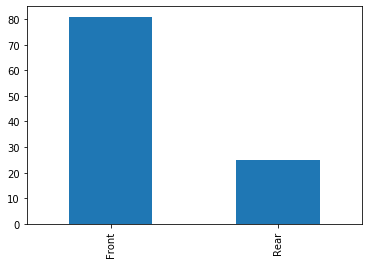

In [15]:
#distribution of categorical variables, drive type
auto['Drive Type'].value_counts().plot(kind='bar')
auto.groupby('Drive Type').size()

Fuel Type
Premium     19
Regular     86
Regular      1
dtype: int64

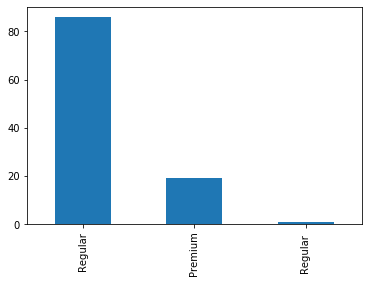

In [16]:
#distribution of categorical variables
auto['Fuel Type'].value_counts().plot(kind='bar')
auto.groupby('Fuel Type').size()

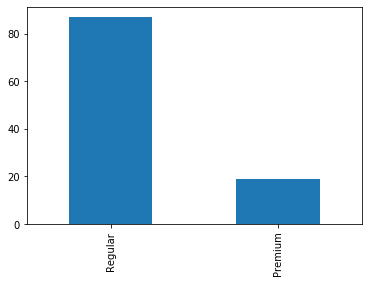

In [17]:
#removal of extra "Regular"
auto['Fuel Type'] = auto['Fuel Type'].str.strip()
auto['Fuel Type'].value_counts().plot(kind='bar')

In [ ]:
## 4. Z-Score Normalization


In [18]:
# new df
auto_z=auto

In [19]:
# show weight type
auto_z.dtypes

Name                         object
Drive Type                   object
Mileage (mpg)               float64
Fuel Type                    object
Capacity (gal)              float64
Length (inches)             float64
Wheel Base (inches)         float64
Width (inches)              float64
Turning Circle (feet)       float64
Weight (lbs)                 object
Door Top (inches)           float64
Luggage (cu. ft.)           float64
Front Shoulder (inches)     float64
Front Leg Room (inches)     float64
Front Head Room (inches)    float64
Rear Shoulder (inches)      float64
Rear Leg Room (inches)      float64
Rear Head Room (inches)     float64
dtype: object

In [20]:
#dtype for weight is object
auto_object = auto_z['Weight (lbs)']
auto_object.head(10)

0    2,635
1    3,460
2    3,350
3    3,640
4    3,880
5    3,325
6    2,795
7    3,495
8    3,350
9    3,075
Name: Weight (lbs), dtype: object

In [21]:
#convert dtype weight (object) to dtype weight (float)
auto_float = auto_object.str.replace(',','').astype(float)
auto_float.head(10)

0    2635.0
1    3460.0
2    3350.0
3    3640.0
4    3880.0
5    3325.0
6    2795.0
7    3495.0
8    3350.0
9    3075.0
Name: Weight (lbs), dtype: float64

In [22]:
#normalization
#transform to Z-Scores manually
weight_z = pd.DataFrame((auto_float-auto_float.mean())/auto_float.std())
weight_z.head(10)

,Weight (lbs)
0,-1.369178
1,-0.066795
2,-0.240446
3,0.217362
4,0.596237
5,-0.279912
6,-1.116595
7,-0.011542
8,-0.240446
9,-0.674574


In [23]:
#weights side by side with z (wsbs)
wsbs = pd.concat([auto_float,weight_z], axis=1)
wsbs.columns = ['Weight (lbs)','Weight (Z)']
wsbs.head(10)

,Weight (lbs),Weight (Z)
0,2635.0,-1.369178
1,3460.0,-0.066795
2,3350.0,-0.240446
3,3640.0,0.217362
4,3880.0,0.596237
5,3325.0,-0.279912
6,2795.0,-1.116595
7,3495.0,-0.011542
8,3350.0,-0.240446
9,3075.0,-0.674574


In [ ]:
## 5. Convert Categorical Variables into Dummies


In [24]:
for col in auto.columns[1:]:
    attName = col
    dType = auto[col].dtype
    missing = pd.isnull(auto[col]).any()
    uniqueCount = len(auto[attName].value_counts(normalize=False))
    if dType == object:
        ap = pd.concat([auto, pd.get_dummies(auto[col], prefix=col)], axis=1)
        del auto[attName]

In [25]:
print(auto.shape)
auto.head()

(106, 15)


,Name,Mileage (mpg),Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
0,Acura Integra,31.0,13.2,172.0,101.0,67.0,39.0,47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5
1,Acura TL,22.0,17.1,193.0,108.0,70.0,40.0,50.0,14.0,56.0,40.5,2.5,55.0,27.0,2.0
2,Buick Century,22.0,17.5,195.0,109.0,73.0,40.0,50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0
3,Buick LeSabre,20.0,17.5,200.0,112.0,74.0,42.0,51.0,18.0,59.5,40.5,5.0,58.0,27.5,4.5
4,Buick Park Avenue,21.0,18.5,207.0,114.0,75.0,43.0,51.0,19.0,59.5,42.5,6.0,58.5,31.5,3.0


In [ ]:
## 6. Correlation Analysis


In [26]:
#numeric correlation output
print(auto.corr())

                          Mileage (mpg)  Capacity (gal)  Length (inches)  \
Mileage (mpg)                  1.000000       -0.787515        -0.387151   
Capacity (gal)                -0.787515        1.000000         0.505427   
Length (inches)               -0.387151        0.505427         1.000000   
Wheel Base (inches)           -0.512751        0.660131         0.869492   
Width (inches)                -0.578650        0.678437         0.832541   
Turning Circle (feet)         -0.571132        0.526678         0.684696   
Door Top (inches)             -0.771332        0.752458         0.117489   
Luggage (cu. ft.)             -0.633763        0.731209         0.261723   
Front Shoulder (inches)       -0.607314        0.722434         0.787516   
Front Leg Room (inches)        0.053420       -0.014806         0.268169   
Front Head Room (inches)      -0.236747        0.274185         0.203634   
Rear Shoulder (inches)        -0.269556        0.213711         0.203753   
Rear Leg Roo

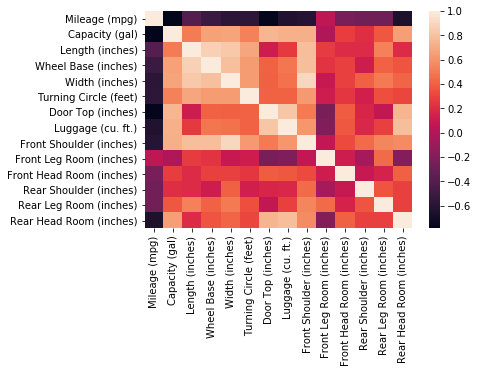

In [27]:
#visual correlation output
import seaborn as sns
corr = auto.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

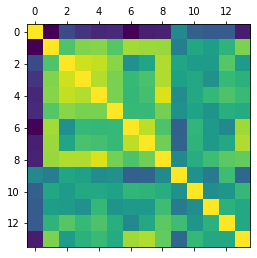

In [28]:
plt.matshow(auto.corr())
plt.show()

In [ ]:
## 7. Principal Component Analysis


In [29]:
# Creating PCA object
pca = PCA(n_components=3)

# Fitting the model
pca.fit(auto.iloc[:,1:])

# Variance
print(pca.explained_variance_ratio_)

[0.62047034 0.24971969 0.07211841]


In [ ]:
## Interpretation

In [ ]:
# The first PCA explains 62% of the variance, the second 
# explains 25% of the variance, and the third component explains 7% 
# of the variance 

In [ ]:
## 8. Scatterplot of non-normalized Weight attribute relative to MPG


In [30]:
# Reading in appropriate data
auto=pd.read_csv("C:/Users/Modeling/Documents/Predictive Models/PM Data/AUTO.csv", encoding='ISO-8859-1')
auto=auto.drop(auto.index[106:190])
auto=auto.fillna(auto.mean())

In [31]:
auto.dtypes

Name                         object
Drive Type                   object
Mileage (mpg)               float64
Fuel Type                    object
Capacity (gal)              float64
Length (inches)             float64
Wheel Base (inches)         float64
Width (inches)              float64
Turning Circle (feet)       float64
Weight (lbs)                 object
Door Top (inches)           float64
Luggage (cu. ft.)           float64
Front Shoulder (inches)     float64
Front Leg Room (inches)     float64
Front Head Room (inches)    float64
Rear Shoulder (inches)      float64
Rear Leg Room (inches)      float64
Rear Head Room (inches)     float64
dtype: object

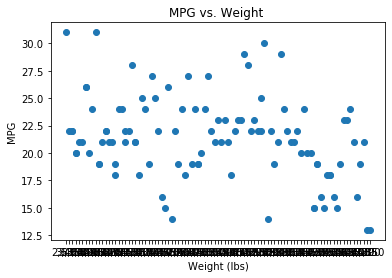

In [32]:
plt.scatter(auto['Weight (lbs)'],auto['Mileage (mpg)'])
plt.title('MPG vs. Weight ')
plt.xlabel('Weight (lbs)')
plt.ylabel('MPG')
plt.show()

In [ ]:
## 9. Histogram Luggage (6 bins) and MPG (7 bins)


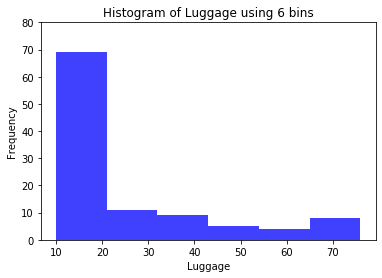

In [33]:
#histogram of luggage using 6 bins
n, bins, patches = plt.hist(auto['Luggage (cu. ft.)'], 6, facecolor='blue', alpha=0.75)
plt.ylim(0, 80)
plt.title('Histogram of Luggage using 6 bins')
plt.xlabel("Luggage")
plt.ylabel("Frequency")
plt.show()

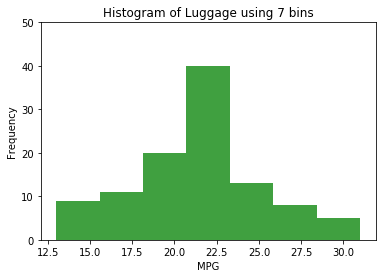

In [34]:
#histogram of MPG using 7 bins
n, bins, patches = plt.hist(auto['Mileage (mpg)'], 7, facecolor='green', alpha=0.75)
plt.ylim(0, 50)
plt.title('Histogram of Luggage using 7 bins')
plt.xlabel("MPG")
plt.ylabel("Frequency")
plt.show()

In [ ]:
## Interpretation

In [ ]:
# When we use 7 bins, we see a normal distribution, unlike when
# we use 6 bins

In [ ]:
## 10. Cross Tabulation of Variables: Fuel Type (FT) vs Drive Type (DT)


In [35]:
#aggregation of the occurrences in a 2x2 table
#crosstab using pandas
auto['Fuel Type'] = auto['Fuel Type'].str.strip()
FTvsDT=pd.crosstab(auto['Fuel Type'], auto['Drive Type'],colnames=['DT'],rownames=['FT'])
print(FTvsDT)

DT       Front  Rear
FT                  
Premium     11     8
Regular     70    17


Text(0, 0.5, 'Vehicles')

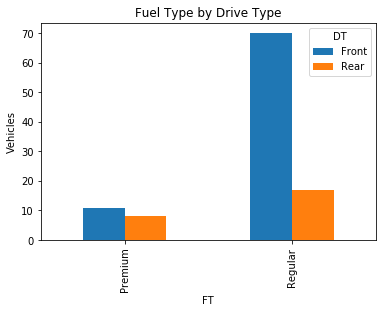

In [36]:
#Bar plot of Fuel Type by Drive Type
FTvsDT.plot(kind='bar')
plt.title('Fuel Type by Drive Type')
plt.ylabel("Vehicles")

In [ ]:
## 11. New data frame


In [37]:
#create a new dataframe where fuel is regular
fuel_reg = auto[auto['Fuel Type'] == 'Regular']
#fuel_reg.head(10)

In [38]:
#create a new dataframe from fuel_sub with MPG over 21 named auto_sub
auto_sub = fuel_reg[fuel_reg['Mileage (mpg)'] > 21]
auto_sub.head(10)

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
0,Acura Integra,Front,31.0,Regular,13.2,172.0,101.0,67.0,39.0,"2,635",47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5
2,Buick Century,Front,22.0,Regular,17.5,195.0,109.0,73.0,40.0,"3,350",50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0
6,Chevrolet Cavalier,Front,26.0,Regular,15.2,181.0,104.0,68.0,38.0,"2,795",50.5,14.0,54.5,41.5,4.5,53.5,28.0,2.0
8,Chevrolet Lumina,Front,22.0,Regular,16.6,201.0,108.0,73.0,44.0,"3,350",51.0,16.0,58.5,42.5,4.5,57.0,30.0,2.0
9,Chevrolet Malibu,Front,24.0,Regular,15.2,190.0,107.0,69.0,40.0,"3,075",50.5,17.0,55.0,43.0,4.5,54.0,30.5,2.0
10,Chevrolet Prizm,Front,31.0,Regular,13.2,175.0,97.0,67.0,34.0,"2,480",48.0,12.0,52.5,40.5,4.0,52.0,26.5,2.0
13,Chrysler Cirrus,Front,22.0,Regular,16.0,186.0,108.0,72.0,39.0,"3,170",49.0,16.0,55.0,42.0,4.0,54.5,31.0,1.5
17,Daewoo Lenganza,Front,24.0,Regular,15.8,184.0,105.0,70.0,41.0,"3,185",50.0,14.0,55.5,42.5,2.5,52.5,30.0,3.5
18,Daewoo Nubira,Front,24.0,Regular,13.7,175.0,101.0,67.0,37.0,"2,815",50.0,13.0,53.5,41.0,4.5,52.5,27.5,3.0
19,Dodge Intrepid,Front,22.0,Regular,17.0,204.0,113.0,75.0,40.0,"3,455",49.0,18.0,58.5,43.0,4.5,57.0,32.5,2.5
